In [1]:
import pandas as pd
import glob
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from pandas import Series
import math
import os
from sklearn import preprocessing
import zipfile
import glob
import shutil

# Contenido textual

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

In [3]:
data_final = pd.read_csv("Data final limpia.csv",sep = ',')
data_final.head()

,id,backers_count,name,blurb,category,photo,urls,city,country,goal,pledged,currency,usd_pledged,created_at,launched_at,deadline,duration,state
0,1000245024,0,Safer Home,Placing furniture against traditional plugs is...,Hardware,https://ksr-ugc.imgix.net/assets/011/663/874/0...,https://www.kickstarter.com/projects/homesafet...,Kamloops,CA,50000.0,0.0,CAD,0.000000,"March 09, 2014","June 03, 2015","July 03, 2015",30,failed
1,1000256230,0,Shreddit - Privacy on Reddit,"Shreddit, a Reddit privacy tool I created and ...",Software,https://ksr-ugc.imgix.net/assets/013/466/903/0...,https://www.kickstarter.com/projects/466914929...,Edinburgh,GB,2000.0,0.0,GBP,0.000000,"August 23, 2016","June 02, 2017","July 02, 2017",30,failed
2,1000261018,3,Diposta - liberating people from their postal ...,The problem of mail: it is physical! Diposta c...,Web,https://ksr-ugc.imgix.net/assets/012/071/808/1...,https://www.kickstarter.com/projects/105350477...,Raleigh,US,100000.0,141.0,USD,141.000000,"March 17, 2015","July 24, 2016","August 23, 2016",30,failed
3,100039820,3,Best Spray Bottle Ever - SureShot,Ever had a spray bottle that has a little bit ...,Gadgets,https://ksr-ugc.imgix.net/assets/012/009/461/3...,https://www.kickstarter.com/projects/110136848...,Edmonton,CA,25000.0,3.0,CAD,2.411101,"January 22, 2015","February 05, 2015","March 07, 2015",30,failed
4,1000468345,6,The iRNinja - Simplify your TV with a wireless...,Control your TV & Audio/Video components by pr...,Gadgets,https://ksr-ugc.imgix.net/assets/016/561/251/1...,https://www.kickstarter.com/projects/5877985/i...,Jupiter,US,500.0,74.0,USD,74.000000,"April 27, 2017","May 10, 2017","June 14, 2017",35,failed


In [4]:
data_descripciones = pd.read_csv("data completa descripciones.csv",sep = ',')
data_descripciones.head(6)

,id,description
0,1000245024,Purpose Safer Home ensures that electrical plu...
1,1000256230,I once had a Reddit account that was four year...
2,1000261018,Every day you go home to a mail box filled wit...
3,100039820,Funds needed for tooling. Once tooling is done...
4,1000468345,The iRNinja is a wireless 4 button keypad that...
5,1000551777,"Gantish is a web-based platform for parents, w..."


In [8]:
# Como el tamaño de Y (que serán las etiquetas) no coinciden con las X (las descripciones, dos filas menos)
# Se busca aquellos proyectos cuyos "id" no aparecen y se borran sus filas

#rows_to_delete = []
#for i in data_final.id.tolist():
#    if i not in data_descripciones.id.tolist():
#        rows_to_delete.append(i)
#        print(i)

#Los resultados fueron: '1642806426' y '365370629'

1642806426
365370629


In [5]:
## Borrar 214 + 2 registros (del script anterior, que son de descripciones) para que coincida cantidad con la base de imágenes

rows_to_delete = [1000245024, 1027265164, 1041765851, 1044019703, 1054657017, 1054989753, 1093227359, 1095756934, 1109096552,
 1110674316, 111350551, 1117138764, 1120478809, 1123861916, 1126827678, 1128156438, 1150700505, 1167178681, 1167412504, 1171176145,
 1185235157, 1195689824, 1196260545, 1196669776, 1227245909, 123026865, 1232162171, 125404469, 1256302160, 1260054574, 1261576550,
 1271185952, 1271697108, 1273321043, 1276268664, 1295436613, 1312887410, 1315773773, 1318933353, 1330209033, 1335140848, 1354201116,
 1357780406, 1377366770, 1379915496, 1382999730, 1383492624, 1383895969, 1417511404, 1431552184, 1433514155, 1440484529, 1453210615,
 1469999815, 1471392588, 147705510, 1480127219, 1501633851, 1519017410, 1525962954, 1536346646, 1551702099, 1557905272, 1580025170,
 1596683891, 1597639357, 1600980167, 1605451234, 1605534062, 1607478408, 1651175038, 1658387069, 1659350880, 1675183980, 1676089131,
 1685376331, 170619371, 1706658113, 1718840874, 172918236, 175239779, 1758745650, 1761301134, 1765651455, 1777726903, 1779005619,
 1789344584, 1791360247, 1792121743, 1795218040, 1806016777, 1811667704, 1818375181, 1822464577, 1838083992, 1852798207, 185563912,
 186326896, 1886853211, 1895840022, 1912915346, 1912916865, 1916794128, 1924131875, 1931946499, 1933459780, 1942409900, 194542013,
 1948690055, 195935865, 1972722926, 1976430969, 1986576162, 1986844872, 2035788565, 2056552145, 2094632032, 210942640, 211982757,
 2122235677, 2130212538, 2133337075, 215329000, 225178854, 230988891, 241210115, 268503228, 268595326, 282962466, 295300250,
 299064543, 32792165, 358879397, 385003810, 398816783, 405697911, 408987268, 41416256, 420078999, 422991637, 431444590, 45179890,
 455670673, 463339053, 466663836, 471806030, 472068165, 480355077, 49755697, 497564918, 513560589, 515623736, 52687056, 529090953,
 537175035, 545791182, 552855493, 561835082, 569931566, 579260709, 579865810, 583266930, 607713968, 622990457, 626229332, 631512515,
 641599646, 646676789, 658977839, 661260786, 679530293, 688235297, 71055019, 718312567, 733153564, 733447376, 748065478, 752848586,
 794223432, 802437399, 805880945, 814433703, 814709614, 835270646, 837611249, 857130732, 857846936, 87114884, 874656260, 884696456,
 894319374, 912105626, 914270204, 91444505, 916080730, 934292049, 939431746, 943847278, 947601096, 949851993, 951887123, 952231046,
 953415668, 953814050, 958225997, 962905414, 965265217, 97315852, 983812442, 984297627, 99033008, 999748644, 999753943, 99996661,
                 1642806426, 365370629]

In [6]:
# Borrando los índices de cada proyecto de la lista de imágenes a eliminar
indexNames = data_descripciones[data_descripciones['id'].isin(rows_to_delete)].index
X = data_descripciones.drop(indexNames , inplace=True)
X = data_descripciones.iloc[:, [1]]
X.head(6)

,description
1,I once had a Reddit account that was four year...
2,Every day you go home to a mail box filled wit...
3,Funds needed for tooling. Once tooling is done...
4,The iRNinja is a wireless 4 button keypad that...
5,"Gantish is a web-based platform for parents, w..."
6,"Hello, At SellEgg, our goal is to establish co..."


In [7]:
# Borrando los índices de cada proyecto de la lista de imágenes a eliminar
indexNames = data_final[data_final['id'].isin(rows_to_delete)].index
Y = data_final.drop(indexNames , inplace=True)
Y = data_final.iloc[:,-1]
#Y = Y.apply(lambda x: 1 if x == 'successful' else 0)
Y.head(8)

1    failed
2    failed
3    failed
4    failed
5    failed
6    failed
7    failed
8    failed
Name: state, dtype: object

In [8]:
len(X),len(Y)

(27035, 27035)

In [9]:
## mostrar el ancho de la columna
pd.options.display.max_colwidth

50

In [10]:
## configurar el ancho de la columna
pd.options.display.max_colwidth = 100
pd.options.display.max_colwidth

100

### RegEx

In [11]:
import re ## regular expression
#!sudo pip install contractions
#!sudo pip install textsearch
import contractions

In [12]:
## remover contracciones
re_contractions = []

for text in X.description:
    try:
        new_text = contractions.fix(text)
        re_contractions.append(new_text)
    except AttributeError:
        new_text = ' '
        re_contractions.append(new_text)

X["re_contractions"] = re_contractions
X.head()  

,description,re_contractions
1,I once had a Reddit account that was four years old with thousands of comments forever stored in...,I once had a Reddit account that was four years old with thousands of comments forever stored in...
2,"Every day you go home to a mail box filled with junk and even worse, if you are a traveler it is...","Every day you go home to a mail box filled with junk and even worse, if you are a traveler it is..."
3,"Funds needed for tooling. Once tooling is done, approximately 30-45 days, bottle production can ...","Funds needed for tooling. Once tooling is done, approximately 30-45 days, bottle production can ..."
4,The iRNinja is a wireless 4 button keypad that controls your entertainment system. It has two co...,The iRNinja is a wireless 4 button keypad that controls your entertainment system. It has two co...
5,"Gantish is a web-based platform for parents, where they can create beautifully designed reward c...","Gantish is a web-based platform for parents, where they can create beautifully designed reward c..."


In [13]:
## remover caracteres especiales
re_special_chars = []

for text in X.re_contractions:
    new_text = re.sub(r"\W+", " ", text) ## remover caracteres
    new_text = re.sub(r'\w*\d\w*', '', new_text) ## remover numbers
    re_special_chars.append(new_text)

X["re_special_char"] = re_special_chars
X.head()

,description,re_contractions,re_special_char
1,I once had a Reddit account that was four years old with thousands of comments forever stored in...,I once had a Reddit account that was four years old with thousands of comments forever stored in...,I once had a Reddit account that was four years old with thousands of comments forever stored in...
2,"Every day you go home to a mail box filled with junk and even worse, if you are a traveler it is...","Every day you go home to a mail box filled with junk and even worse, if you are a traveler it is...",Every day you go home to a mail box filled with junk and even worse if you are a traveler it is ...
3,"Funds needed for tooling. Once tooling is done, approximately 30-45 days, bottle production can ...","Funds needed for tooling. Once tooling is done, approximately 30-45 days, bottle production can ...",Funds needed for tooling Once tooling is done approximately days bottle production can begin P...
4,The iRNinja is a wireless 4 button keypad that controls your entertainment system. It has two co...,The iRNinja is a wireless 4 button keypad that controls your entertainment system. It has two co...,The iRNinja is a wireless button keypad that controls your entertainment system It has two comp...
5,"Gantish is a web-based platform for parents, where they can create beautifully designed reward c...","Gantish is a web-based platform for parents, where they can create beautifully designed reward c...",Gantish is a web based platform for parents where they can create beautifully designed reward ch...


In [14]:
## lower_case
lower_case = []

for tex in X.re_special_char:
    new_text = tex.lower()
    lower_case.append(new_text)

X["lower_case"] = lower_case
X.head()

,description,re_contractions,re_special_char,lower_case
1,I once had a Reddit account that was four years old with thousands of comments forever stored in...,I once had a Reddit account that was four years old with thousands of comments forever stored in...,I once had a Reddit account that was four years old with thousands of comments forever stored in...,i once had a reddit account that was four years old with thousands of comments forever stored in...
2,"Every day you go home to a mail box filled with junk and even worse, if you are a traveler it is...","Every day you go home to a mail box filled with junk and even worse, if you are a traveler it is...",Every day you go home to a mail box filled with junk and even worse if you are a traveler it is ...,every day you go home to a mail box filled with junk and even worse if you are a traveler it is ...
3,"Funds needed for tooling. Once tooling is done, approximately 30-45 days, bottle production can ...","Funds needed for tooling. Once tooling is done, approximately 30-45 days, bottle production can ...",Funds needed for tooling Once tooling is done approximately days bottle production can begin P...,funds needed for tooling once tooling is done approximately days bottle production can begin p...
4,The iRNinja is a wireless 4 button keypad that controls your entertainment system. It has two co...,The iRNinja is a wireless 4 button keypad that controls your entertainment system. It has two co...,The iRNinja is a wireless button keypad that controls your entertainment system It has two comp...,the irninja is a wireless button keypad that controls your entertainment system it has two comp...
5,"Gantish is a web-based platform for parents, where they can create beautifully designed reward c...","Gantish is a web-based platform for parents, where they can create beautifully designed reward c...",Gantish is a web based platform for parents where they can create beautifully designed reward ch...,gantish is a web based platform for parents where they can create beautifully designed reward ch...


### Tokenization
<br>
<img src="https://cdn-images-1.medium.com/max/1600/1*7zGIb_pi6906J60Dm7YgyA.png" width="400">

In [15]:
import nltk
from nltk.tokenize import word_tokenize
#nltk.download('punkt')

In [16]:
## tokenización
tokens = []

for text in X.lower_case:
    new_text = word_tokenize(text)
    tokens.append(new_text)

X["tokens"] = tokens
X.head()

,description,re_contractions,re_special_char,lower_case,tokens
1,I once had a Reddit account that was four years old with thousands of comments forever stored in...,I once had a Reddit account that was four years old with thousands of comments forever stored in...,I once had a Reddit account that was four years old with thousands of comments forever stored in...,i once had a reddit account that was four years old with thousands of comments forever stored in...,"[i, once, had, a, reddit, account, that, was, four, years, old, with, thousands, of, comments, f..."
2,"Every day you go home to a mail box filled with junk and even worse, if you are a traveler it is...","Every day you go home to a mail box filled with junk and even worse, if you are a traveler it is...",Every day you go home to a mail box filled with junk and even worse if you are a traveler it is ...,every day you go home to a mail box filled with junk and even worse if you are a traveler it is ...,"[every, day, you, go, home, to, a, mail, box, filled, with, junk, and, even, worse, if, you, are..."
3,"Funds needed for tooling. Once tooling is done, approximately 30-45 days, bottle production can ...","Funds needed for tooling. Once tooling is done, approximately 30-45 days, bottle production can ...",Funds needed for tooling Once tooling is done approximately days bottle production can begin P...,funds needed for tooling once tooling is done approximately days bottle production can begin p...,"[funds, needed, for, tooling, once, tooling, is, done, approximately, days, bottle, production, ..."
4,The iRNinja is a wireless 4 button keypad that controls your entertainment system. It has two co...,The iRNinja is a wireless 4 button keypad that controls your entertainment system. It has two co...,The iRNinja is a wireless button keypad that controls your entertainment system It has two comp...,the irninja is a wireless button keypad that controls your entertainment system it has two comp...,"[the, irninja, is, a, wireless, button, keypad, that, controls, your, entertainment, system, it,..."
5,"Gantish is a web-based platform for parents, where they can create beautifully designed reward c...","Gantish is a web-based platform for parents, where they can create beautifully designed reward c...",Gantish is a web based platform for parents where they can create beautifully designed reward ch...,gantish is a web based platform for parents where they can create beautifully designed reward ch...,"[gantish, is, a, web, based, platform, for, parents, where, they, can, create, beautifully, desi..."


### StopWords
<br>
<img src="http://www.aqusagtechnologies.com/wp-content/uploads/2015/12/stopwords.jpg" width="400">

In [17]:
from nltk.corpus import stopwords
#nltk.download('stopwords')

In [18]:
## configurar stopwords
stop_w = set(stopwords.words("english"))
print(stop_w)

{'y', 'theirs', 'how', "didn't", 'll', 'their', 'she', "it's", 'do', "mustn't", 'was', 'him', 'it', 'those', 'itself', 'other', 'have', 'under', 'all', "needn't", 'too', 't', 'out', 'can', 'herself', 'then', 'why', 'about', 'in', 'not', 'here', "weren't", 'with', 'between', 'but', "she's", 'once', 'our', 'does', 'until', 'been', 'that', 'ma', 'o', 'had', 'mustn', 'if', 'mightn', 'am', 'now', 'into', 'should', 'hasn', 'ourselves', "won't", 'myself', 'they', 'against', 'on', 'me', 'which', 'more', "isn't", 'your', 'you', 'shan', 'he', 'shouldn', 'same', "doesn't", 'its', 'to', 'again', "hadn't", 'himself', 'themselves', 'the', 'whom', 'such', 'by', 'after', 'than', 'very', 'are', "shan't", 'doesn', 'these', 'a', 'because', 'weren', "should've", 'down', 'while', 'for', 'at', 'them', "wasn't", 'any', 'wasn', "mightn't", 'will', 'most', 'isn', 'who', "you've", 'only', 'few', 've', 'don', "wouldn't", 'yourself', 'has', 'of', 'below', 'just', "couldn't", "aren't", "you'll", 'what', 'during', 

In [19]:
## remove stopwords
re_stopwords = []

for lista in X.tokens:
    not_stopwords = []
  
    for w in lista:
        if w not in stop_w:
            not_stopwords.append(w)
    re_stopwords.append(not_stopwords)

X["re_stopwords"] = re_stopwords
X.head()

,description,re_contractions,re_special_char,lower_case,tokens,re_stopwords
1,I once had a Reddit account that was four years old with thousands of comments forever stored in...,I once had a Reddit account that was four years old with thousands of comments forever stored in...,I once had a Reddit account that was four years old with thousands of comments forever stored in...,i once had a reddit account that was four years old with thousands of comments forever stored in...,"[i, once, had, a, reddit, account, that, was, four, years, old, with, thousands, of, comments, f...","[reddit, account, four, years, old, thousands, comments, forever, stored, reddit, archives, cons..."
2,"Every day you go home to a mail box filled with junk and even worse, if you are a traveler it is...","Every day you go home to a mail box filled with junk and even worse, if you are a traveler it is...",Every day you go home to a mail box filled with junk and even worse if you are a traveler it is ...,every day you go home to a mail box filled with junk and even worse if you are a traveler it is ...,"[every, day, you, go, home, to, a, mail, box, filled, with, junk, and, even, worse, if, you, are...","[every, day, go, home, mail, box, filled, junk, even, worse, traveler, overflowing, quickly, mai..."
3,"Funds needed for tooling. Once tooling is done, approximately 30-45 days, bottle production can ...","Funds needed for tooling. Once tooling is done, approximately 30-45 days, bottle production can ...",Funds needed for tooling Once tooling is done approximately days bottle production can begin P...,funds needed for tooling once tooling is done approximately days bottle production can begin p...,"[funds, needed, for, tooling, once, tooling, is, done, approximately, days, bottle, production, ...","[funds, needed, tooling, tooling, done, approximately, days, bottle, production, begin, patents,..."
4,The iRNinja is a wireless 4 button keypad that controls your entertainment system. It has two co...,The iRNinja is a wireless 4 button keypad that controls your entertainment system. It has two co...,The iRNinja is a wireless button keypad that controls your entertainment system It has two comp...,the irninja is a wireless button keypad that controls your entertainment system it has two comp...,"[the, irninja, is, a, wireless, button, keypad, that, controls, your, entertainment, system, it,...","[irninja, wireless, button, keypad, controls, entertainment, system, two, components, keypad, mo..."
5,"Gantish is a web-based platform for parents, where they can create beautifully designed reward c...","Gantish is a web-based platform for parents, where they can create beautifully designed reward c...",Gantish is a web based platform for parents where they can create beautifully designed reward ch...,gantish is a web based platform for parents where they can create beautifully designed reward ch...,"[gantish, is, a, web, based, platform, for, parents, where, they, can, create, beautifully, desi...","[gantish, web, based, platform, parents, create, beautifully, designed, reward, charts, children..."


### Lematización

In [20]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

In [21]:
from textblob import TextBlob, Word
import nltk
#nltk.download('averaged_perceptron_tagger')
#!sudo pip install pattern   #No se pudo instalar bien, falta my_sql

In [22]:
## lemmatization
# Más tipos: https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

lemmatizer = WordNetLemmatizer()

lemmatization = []

for lista in X.re_stopwords:
    lemmas = []
  
    for w in lista:  
        word1 = lemmatizer.lemmatize(w, pos = "n")      #Lematizando con NLTK
        word2 = lemmatizer.lemmatize(word1, pos = "v")
        word3 = lemmatizer.lemmatize(word2, pos = ("a"))
        lemmas.append(word3)
        #new_text = lemmatize_with_postag(w)  #Lematizando con TextBlob
    
    lemmatization.append(lemmas)

X["lemmatization"] = lemmatization
X.head()

,description,re_contractions,re_special_char,lower_case,tokens,re_stopwords,lemmatization
1,I once had a Reddit account that was four years old with thousands of comments forever stored in...,I once had a Reddit account that was four years old with thousands of comments forever stored in...,I once had a Reddit account that was four years old with thousands of comments forever stored in...,i once had a reddit account that was four years old with thousands of comments forever stored in...,"[i, once, had, a, reddit, account, that, was, four, years, old, with, thousands, of, comments, f...","[reddit, account, four, years, old, thousands, comments, forever, stored, reddit, archives, cons...","[reddit, account, four, year, old, thousand, comment, forever, store, reddit, archive, consider,..."
2,"Every day you go home to a mail box filled with junk and even worse, if you are a traveler it is...","Every day you go home to a mail box filled with junk and even worse, if you are a traveler it is...",Every day you go home to a mail box filled with junk and even worse if you are a traveler it is ...,every day you go home to a mail box filled with junk and even worse if you are a traveler it is ...,"[every, day, you, go, home, to, a, mail, box, filled, with, junk, and, even, worse, if, you, are...","[every, day, go, home, mail, box, filled, junk, even, worse, traveler, overflowing, quickly, mai...","[every, day, go, home, mail, box, fill, junk, even, bad, traveler, overflow, quickly, mail, hold..."
3,"Funds needed for tooling. Once tooling is done, approximately 30-45 days, bottle production can ...","Funds needed for tooling. Once tooling is done, approximately 30-45 days, bottle production can ...",Funds needed for tooling Once tooling is done approximately days bottle production can begin P...,funds needed for tooling once tooling is done approximately days bottle production can begin p...,"[funds, needed, for, tooling, once, tooling, is, done, approximately, days, bottle, production, ...","[funds, needed, tooling, tooling, done, approximately, days, bottle, production, begin, patents,...","[fund, need, tool, tool, do, approximately, day, bottle, production, begin, patent, file, pendin..."
4,The iRNinja is a wireless 4 button keypad that controls your entertainment system. It has two co...,The iRNinja is a wireless 4 button keypad that controls your entertainment system. It has two co...,The iRNinja is a wireless button keypad that controls your entertainment system It has two comp...,the irninja is a wireless button keypad that controls your entertainment system it has two comp...,"[the, irninja, is, a, wireless, button, keypad, that, controls, your, entertainment, system, it,...","[irninja, wireless, button, keypad, controls, entertainment, system, two, components, keypad, mo...","[irninja, wireless, button, keypad, control, entertainment, system, two, component, keypad, moun..."
5,"Gantish is a web-based platform for parents, where they can create beautifully designed reward c...","Gantish is a web-based platform for parents, where they can create beautifully designed reward c...",Gantish is a web based platform for parents where they can create beautifully designed reward ch...,gantish is a web based platform for parents where they can create beautifully designed reward ch...,"[gantish, is, a, web, based, platform, for, parents, where, they, can, create, beautifully, desi...","[gantish, web, based, platform, parents, create, beautifully, designed, reward, charts, children...","[gantish, web, base, platform, parent, create, beautifully, design, reward, chart, child, simple..."


In [23]:
## join tokens
text_clean = []

#for lista in X.not_strange:
for lista in X.lemmatization:
    text = " ".join(lista).strip()
    text_clean.append(text)

X["text_clean"] = text_clean
X.head()

,description,re_contractions,re_special_char,lower_case,tokens,re_stopwords,lemmatization,text_clean
1,I once had a Reddit account that was four years old with thousands of comments forever stored in...,I once had a Reddit account that was four years old with thousands of comments forever stored in...,I once had a Reddit account that was four years old with thousands of comments forever stored in...,i once had a reddit account that was four years old with thousands of comments forever stored in...,"[i, once, had, a, reddit, account, that, was, four, years, old, with, thousands, of, comments, f...","[reddit, account, four, years, old, thousands, comments, forever, stored, reddit, archives, cons...","[reddit, account, four, year, old, thousand, comment, forever, store, reddit, archive, consider,...",reddit account four year old thousand comment forever store reddit archive consider see example ...
2,"Every day you go home to a mail box filled with junk and even worse, if you are a traveler it is...","Every day you go home to a mail box filled with junk and even worse, if you are a traveler it is...",Every day you go home to a mail box filled with junk and even worse if you are a traveler it is ...,every day you go home to a mail box filled with junk and even worse if you are a traveler it is ...,"[every, day, you, go, home, to, a, mail, box, filled, with, junk, and, even, worse, if, you, are...","[every, day, go, home, mail, box, filled, junk, even, worse, traveler, overflowing, quickly, mai...","[every, day, go, home, mail, box, fill, junk, even, bad, traveler, overflow, quickly, mail, hold...",every day go home mail box fill junk even bad traveler overflow quickly mail hold mail forward r...
3,"Funds needed for tooling. Once tooling is done, approximately 30-45 days, bottle production can ...","Funds needed for tooling. Once tooling is done, approximately 30-45 days, bottle production can ...",Funds needed for tooling Once tooling is done approximately days bottle production can begin P...,funds needed for tooling once tooling is done approximately days bottle production can begin p...,"[funds, needed, for, tooling, once, tooling, is, done, approximately, days, bottle, production, ...","[funds, needed, tooling, tooling, done, approximately, days, bottle, production, begin, patents,...","[fund, need, tool, tool, do, approximately, day, bottle, production, begin, patent, file, pendin...",fund need tool tool do approximately day bottle production begin patent file pending huge market...
4,The iRNinja is a wireless 4 button keypad that controls your entertainment system. It has two co...,The iRNinja is a wireless 4 button keypad that controls your entertainment system. It has two co...,The iRNinja is a wireless button keypad that controls your entertainment system It has two comp...,the irninja is a wireless button keypad that controls your entertainment system it has two comp...,"[the, irninja, is, a, wireless, button, keypad, that, controls, your, entertainment, system, it,...","[irninja, wireless, button, keypad, controls, entertainment, system, two, components, keypad, mo...","[irninja, wireless, button, keypad, control, entertainment, system, two, component, keypad, moun...",irninja wireless button keypad control entertainment system two component keypad mount wall base...
5,"Gantish is a web-based platform for parents, where they can create beautifully designed reward c...","Gantish is a web-based platform for parents, where they can create beautifully designed reward c...",Gantish is a web based platform for parents where they can create beautifully designed reward ch...,gantish is a web based platform for parents where they can create beautifully designed reward ch...,"[gantish, is, a, web, based, platform, for, parents, where, they, can, create, beautifully, desi...","[gantish, web, based, platform, parents, create, beautifully, designed, reward, charts, children...","[gantish, web, base, platform, parent, create, beautif

## Train & Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_ = X.loc[:, ["text_clean"]]
X_.head()

,text_clean
1,reddit account four year old thousand comment forever store reddit archive consider see example ...
2,every day go home mail box fill junk even bad traveler overflow quickly mail hold mail forward r...
3,fund need tool tool do approximately day bottle production begin patent file pending huge market...
4,irninja wireless button keypad control entertainment system two component keypad mount wall base...
5,gantish web base platform parent create beautifully design reward chart child simple step design...


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_,
                                                    Y,
                                                    test_size = 0.2,
                                                    random_state = 50)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21628, 1)
(21628,)
(5407, 1)
(5407,)


## Vectores de Características

### Bag of Words

<img src="http://uc-r.github.io/public/images/analytics/feature-engineering/bow-image.png" width="400">

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
## bow EJEMPLO
bow_df = pd.DataFrame()



sentences = ["Machine learning is great",
             "Natural Language Processing is a complex field",
             "Natural Language Processing is used in machine learning"]

vectorizer = CountVectorizer() ## objeto bow
vocabulario = vectorizer.fit(sentences) ## entrenar el vocabulario
print("=====Objeto BoW")
print(vocabulario)

print("\n=====Vocabulario BoW")
print(vocabulario.vocabulary_) ## vocabulario

bow = vocabulario.transform(["machine learning"]).toarray() ## vector de características
print("\n=====Vector de Características")
print(bow)

=====Objeto BoW
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

=====Vocabulario BoW
{'language': 5, 'field': 1, 'complex': 0, 'processing': 9, 'machine': 7, 'used': 10, 'natural': 8, 'in': 3, 'is': 4, 'learning': 6, 'great': 2}

=====Vector de Características
[[0 0 0 0 0 0 1 1 0 0 0]]


In [29]:
## text array
descriptions = X.text_clean
descriptions[0:10]

1     reddit account four year old thousand comment forever store reddit archive consider see example ...
2     every day go home mail box fill junk even bad traveler overflow quickly mail hold mail forward r...
3     fund need tool tool do approximately day bottle production begin patent file pending huge market...
4     irninja wireless button keypad control entertainment system two component keypad mount wall base...
5     gantish web base platform parent create beautifully design reward chart child simple step design...
6     hello sellegg goal establish connection people sell various product interest consumer want buy p...
7     want build wearable musical light suit create respond music visithttp www youtube com watch v id...
8     hello name kenneth steenrod involve reenactment community since year recognize clear need two th...
9     hello kickstarter excite launch share first product odin kickstarter community help produce firs...
10    amazon echo echo dot currently portable 

### Bag Of Words

In [30]:
## BoW
vectorizer = CountVectorizer()
bow = vectorizer.fit(descriptions)
print(bow.vocabulary_)

{'cuteness': 37245, 'huni': 73091, 'frecuentemente': 59955, 'moverse': 102184, 'nextpakk': 106292, 'adsoftheworld': 2658, 'coordina': 34508, 'lichtstärke': 89928, 'regus': 129988, 'semiochemicals': 138737, 'craeting': 35583, 'ultralights': 163521, 'haveundergone': 69422, 'withsmallest': 175063, 'leonie': 89323, 'erübrigen': 51674, 'représentative': 131129, 'lng': 91476, 'kaustubh': 83874, 'drucks': 44876, 'comuni': 32358, 'projectile': 123938, 'vente': 167788, 'kennzahlen': 84204, 'cafe': 24440, 'cpo': 35543, 'fachanwalt': 54641, 'isolatedcontrolthat': 80528, 'anstellen': 8730, 'reytblat': 132330, 'multiface': 102735, 'pflegebook': 117391, 'vitali': 169900, 'artform': 11449, 'probando': 123028, 'foothealth': 58640, 'descubierto': 40235, 'upon': 165679, 'adopt': 2540, 'cubie': 36739, 'rumble': 134525, 'olmstead': 110247, 'elltechs': 48640, 'fermentable': 56074, 'yogapants': 177151, 'damn': 37827, 'nationwide': 104766, 'modération': 100647, 'inculde': 76229, 'ofabandonedpets': 109187, 'u

In [31]:
## tamaño del vocabulario
len(bow.vocabulary_)

183249

In [32]:
## matrix BoW
X_train_bow = bow.transform(X_train.text_clean)
X_test_bow = bow.transform(X_test.text_clean)

X_train_bow, X_test_bow

(<21628x183249 sparse matrix of type '<class 'numpy.int64'>'
 	with 4001671 stored elements in Compressed Sparse Row format>,
 <5407x183249 sparse matrix of type '<class 'numpy.int64'>'
 	with 1007306 stored elements in Compressed Sparse Row format>)

### Nube de palabras

In [33]:
temp_vec = X.text_clean.values.tolist()
description_words = ' '.join(temp_vec)
del temp_vec

In [34]:
#!sudo pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [35]:
#!sudo pip install textblob
from textblob import TextBlob
import nltk
#nltk.download("punkt")

In [36]:
word_cloud_all = WordCloud().generate(description_words)

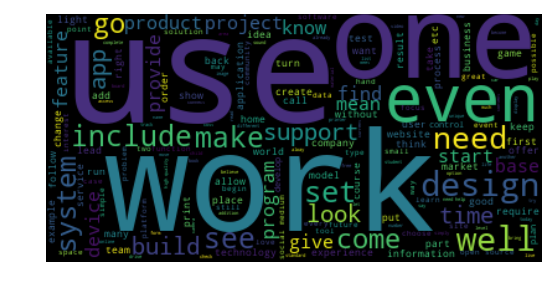

In [37]:
plt.rcdefaults()
plt.imshow(word_cloud_all, interpolation = "bilinear")
plt.axis("off")
plt.show()

### TF-IDF

<br>
<img src="https://cdn-images-1.medium.com/max/1600/1*ImQJjYGLq2GE4eX40Mh28Q.png" width="400">

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
## TF-IDF
tf_idf = TfidfVectorizer()
tf_idf.fit(descriptions)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [40]:
X_train_tf_idf = tf_idf.transform(X_train.text_clean)
X_test_tf_idf = tf_idf.transform(X_test.text_clean)

X_train_tf_idf, X_test_tf_idf

(<21628x183249 sparse matrix of type '<class 'numpy.float64'>'
 	with 4001671 stored elements in Compressed Sparse Row format>,
 <5407x183249 sparse matrix of type '<class 'numpy.float64'>'
 	with 1007306 stored elements in Compressed Sparse Row format>)

## Clasificador

### Support Vector Machine

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import time
import warnings
warnings.simplefilter("ignore")

In [42]:
embeddings = [["BOW", X_train_bow, X_test_bow],
              ["TF-IDF", X_train_tf_idf, X_test_tf_idf]]

weights=[]
models=[]
for e, e_train, e_test in embeddings:
    start_time = time.clock() 
    svm = SVC(kernel = "linear", C = 10)
    svm.fit(e_train, y_train)
    models.append(svm)
    weights.append(svm.coef_)
    print(round(time.clock() - start_time, 2), "segundos de training")
  
    y_pred = svm.predict(e_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("El accuracy para {} es de: {}".format(e, accuracy))
  
    print("="*50)

7396.74 segundos de training
El accuracy para BOW es de: 0.7321990012946181
3933.83 segundos de training
El accuracy para TF-IDF es de: 0.7540225633438136


In [43]:
bow_svm_weights = weights[0]
tfidf_svm_weights = weights[1]

In [44]:
print(bow_svm_weights)

  (0, 158551)	0.05368156115940861
  (0, 114584)	0.010736312231881722
  (0, 109752)	0.010736312231881722
  (0, 88824)	0.04294524892752689
  (0, 73498)	0.010736312231881722
  (0, 72602)	0.21472624463763443
  (0, 61996)	0.010736312231881722
  (0, 43759)	0.010736312231881722
  (0, 15719)	0.010736312231881722
  (0, 12857)	0.010736312231881722
  (0, 9807)	0.010736312231881722
  (0, 173389)	0.0022407834532498965
  (0, 159041)	0.0022407834532498965
  (0, 152835)	0.0022407834532498965
  (0, 109178)	0.004481566906499793
  (0, 76123)	0.0022407834532498965
  (0, 3005)	0.0022407834532498965
  (0, 166051)	0.23860990586672998
  (0, 52772)	0.07953663528890999
  (0, 6485)	0.07953663528890999
  (0, 3136)	0.07953663528890999
  (0, 175976)	0.018069552304402558
  (0, 157783)	0.018069552304402558
  (0, 149976)	0.018069552304402558
  (0, 147557)	0.018069552304402558
  :	:
  (0, 22208)	0.07048953974105851
  (0, 21838)	-0.11998267185018174
  (0, 20820)	0.02408048213153341
  (0, 18021)	0.0226039870678755
  (0, 

In [45]:
print(tfidf_svm_weights)

  (0, 169486)	0.2908124482404718
  (0, 168990)	0.036351556030058976
  (0, 165564)	0.036351556030058976
  (0, 163964)	0.21810933618035389
  (0, 136480)	0.036351556030058976
  (0, 129279)	0.03395453242603495
  (0, 94261)	0.036351556030058976
  (0, 94212)	0.036351556030058976
  (0, 93569)	0.036351556030058976
  (0, 60561)	0.036351556030058976
  (0, 21140)	0.036351556030058976
  (0, 16225)	0.036351556030058976
  (0, 13181)	0.036351556030058976
  (0, 7865)	0.07270311206011795
  (0, 7864)	0.036351556030058976
  (0, 158551)	0.4045166398880718
  (0, 114584)	0.08090332797761436
  (0, 109752)	0.08090332797761436
  (0, 88824)	0.32361331191045745
  (0, 73498)	0.08090332797761436
  (0, 72602)	1.511371161618795
  (0, 61996)	0.08090332797761436
  (0, 43759)	0.08090332797761436
  (0, 15719)	0.08090332797761436
  (0, 12857)	0.08090332797761436
  :	:
  (0, 22208)	0.29895926482126506
  (0, 21838)	-0.9012207898243065
  (0, 20820)	0.49985658890214224
  (0, 18021)	0.0918703389004735
  (0, 17777)	0.640222269

## Guardar modelo

In [81]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle

# save the model to disk
filename = 'description_model_bow.sav'
pickle.dump(models[0], open(filename, 'wb'))

# save the model to disk
filename = 'description_model_tfidf.sav'
pickle.dump(models[1], open(filename, 'wb'))

# saving weights
dataframe_bow_svm_weights = pd.DataFrame(bow_svm_weights.toarray()[0].tolist(), columns=['bow_svm_weights']) 
dataframe_bow_svm_weights.to_csv('description_bow_weights.csv', index = None, header=True)

dataframe_tfidf_svm_weights = pd.DataFrame(tfidf_svm_weights.toarray()[0].tolist(), columns=['tfidf_svm_weights']) 
dataframe_tfidf_svm_weights.to_csv('description_tfidf_weights.csv', index = None, header=True)